### Ensure to upload the following files, if training on Google Colab
- CustomDataModule.py
- model.py
- processing.py
- MS_SSIM_L1_lOSS.py
- checkpoints/ (if training from checkpoint)

In [ ]:
! pip3 install torch torchvision torchaudio
! pip3 install numpy
! pip3  install matplotlib
! pip3 install pytorch-lightning

In [2]:
import torch
import torchvision
from torch import nn, optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import time
import os
from MS_SSIM_L1_loss import MS_SSIM_L1_LOSS
from processing import grey_to_rgb, get_latest_epoch, resume, checkpoint, imshow, get_epoch
from model import Autoencoder, train, test, disp_test_loss
from CustomDataModule import CustomDataModule

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!unzip drive/MyDrive/sim_pairs.zip

In [5]:
# Device and model hyperparameters
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Autoencoder().to(device)
criterion = MS_SSIM_L1_LOSS()
# Loading checkpoint
checkpoint_dir = "./checkpoints"
loading_epoch = get_latest_epoch(checkpoint_dir)
if loading_epoch != 0:
    resume(model, f"{str(checkpoint_dir)}/MS_SSIM_L1-epoch-{str(loading_epoch)}.pth")
    print(f"start inference from epoch {str(loading_epoch)}")
else:
    raise Exception("No checkpoint found, please upload checkpoint for inference")

start inference from epoch 50


In [6]:
batch_size = 2
sim_pairs = CustomDataModule(data_dir='./sim_pairs/', batch_size=2, train_size = 1.0)
sim_pairs.transform()
num_classes = len(sim_pairs.dataset.classes)
dataloader = sim_pairs.ordered_dataloader()
dataiter = iter(dataloader)
# print the shape of the data
print('length of dataiter',len(dataiter))
img, label = next(dataiter)
print(f'image shape:{img.shape}, label shape: {label.shape}') # torch.Size([2, 3, 96, 192]) torch.Size([2])
# to refresh dataloader
dataloader = sim_pairs.ordered_dataloader()
dataiter = iter(dataloader)

length of dataiter 20
image shape:torch.Size([2, 3, 96, 192]), label shape: torch.Size([2])


#### Print the loss between the pairs of images both original and reconstructed

torch.Size([1, 3, 96, 192])


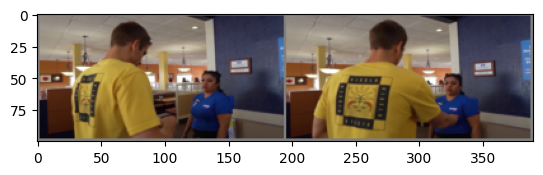

Post reconstruction loss for class 0 is 38.6498


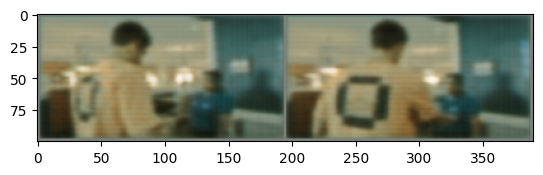

Post reconstruction loss for class 0 is 28.5516
torch.Size([1, 3, 96, 192])


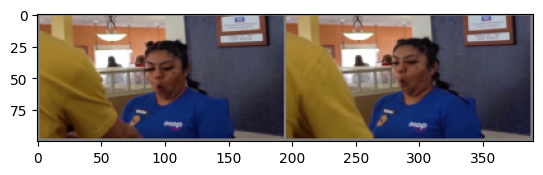

Post reconstruction loss for class 1 is 19.7506


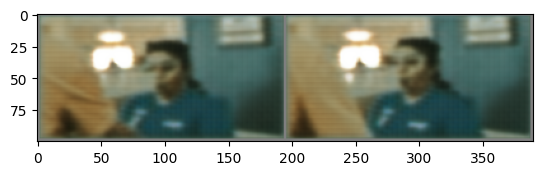

Post reconstruction loss for class 1 is 15.4399
torch.Size([1, 3, 96, 192])


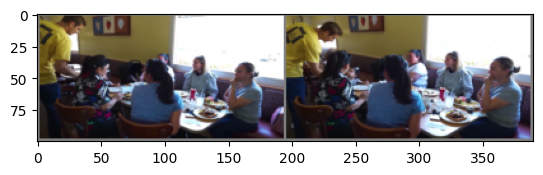

Post reconstruction loss for class 2 is 49.0135


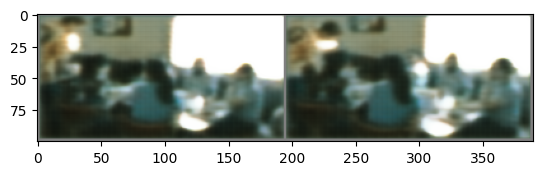

Post reconstruction loss for class 2 is 36.1056
torch.Size([1, 3, 96, 192])


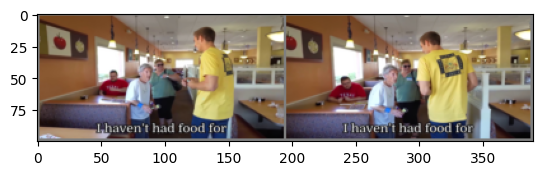

Post reconstruction loss for class 3 is 53.9571


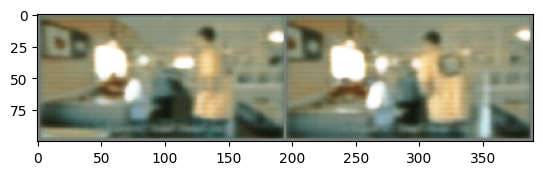

Post reconstruction loss for class 3 is 39.5322


torch.Size([1, 3, 96, 192])


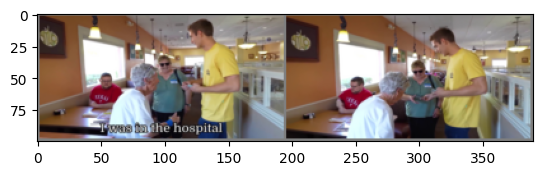

Post reconstruction loss for class 4 is 54.5748


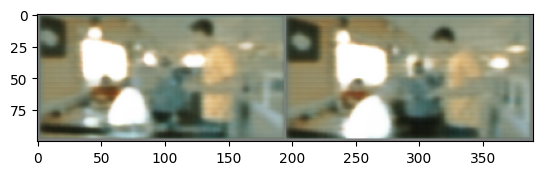

Post reconstruction loss for class 4 is 41.9228
torch.Size([1, 3, 96, 192])


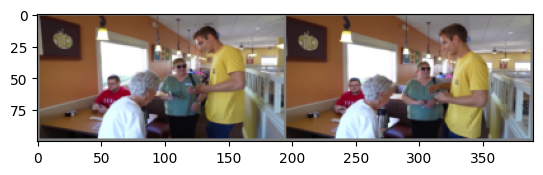

Post reconstruction loss for class 5 is 44.2373


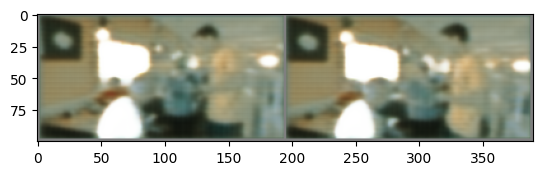

Post reconstruction loss for class 5 is 30.4354
torch.Size([1, 3, 96, 192])


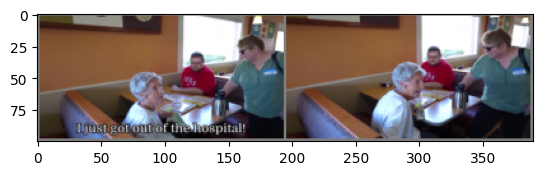

Post reconstruction loss for class 6 is 49.2957


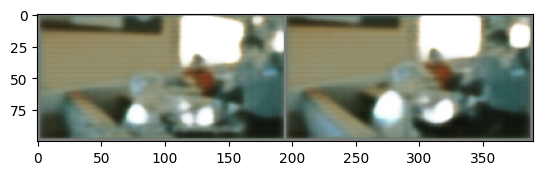

Post reconstruction loss for class 6 is 39.6233
torch.Size([1, 3, 96, 192])


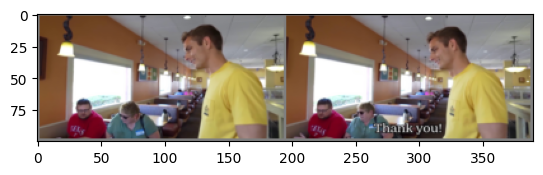

Post reconstruction loss for class 7 is 34.4475


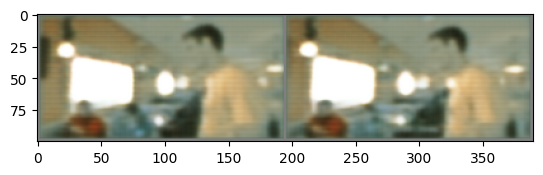

Post reconstruction loss for class 7 is 23.2314
torch.Size([1, 3, 96, 192])


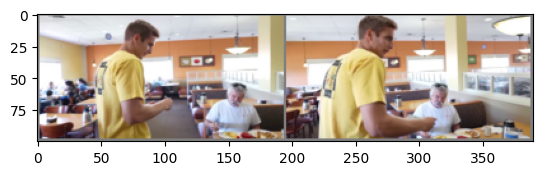

Post reconstruction loss for class 8 is 77.6307


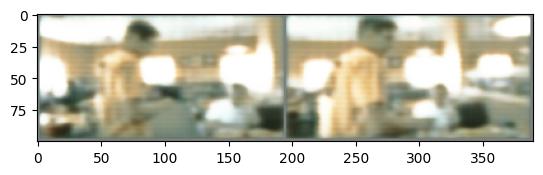

Post reconstruction loss for class 8 is 69.5204
torch.Size([1, 3, 96, 192])


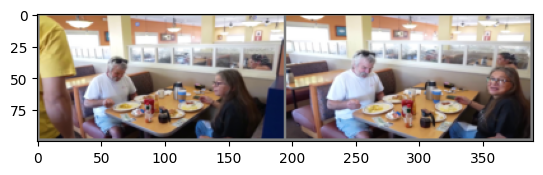

Post reconstruction loss for class 9 is 65.1175


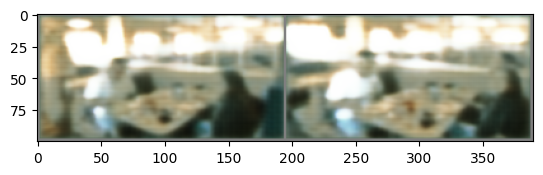

Post reconstruction loss for class 9 is 49.8171
torch.Size([1, 3, 96, 192])


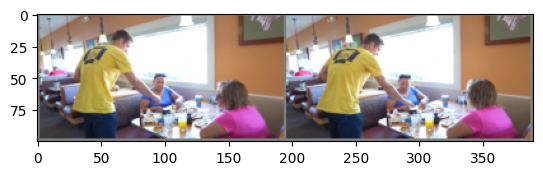

Post reconstruction loss for class 10 is 15.5680


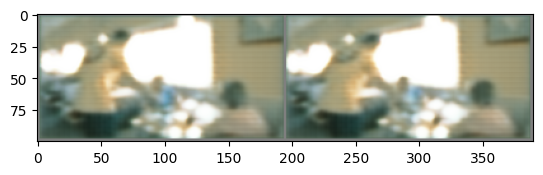

Post reconstruction loss for class 10 is 8.0577
torch.Size([1, 3, 96, 192])


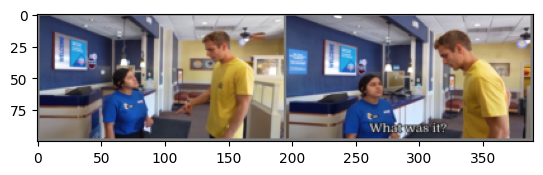

Post reconstruction loss for class 11 is 74.6261


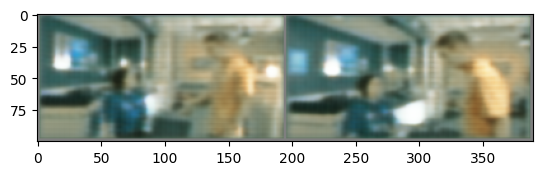

Post reconstruction loss for class 11 is 54.5108
torch.Size([1, 3, 96, 192])


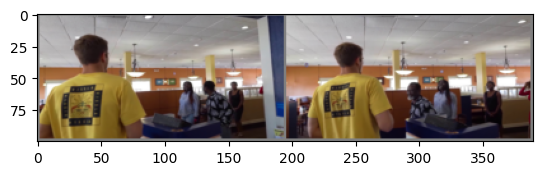

Post reconstruction loss for class 12 is 53.5949


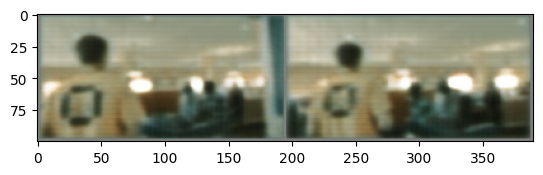

Post reconstruction loss for class 12 is 41.0663


torch.Size([1, 3, 96, 192])


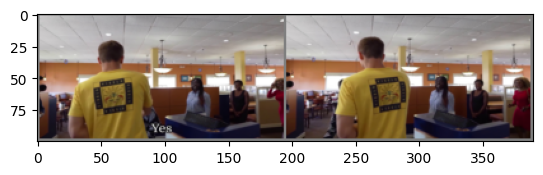

Post reconstruction loss for class 13 is 35.4044


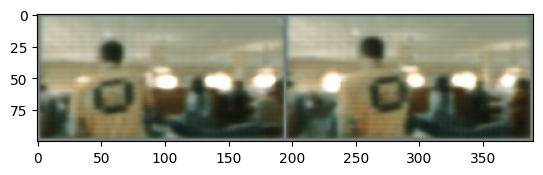

Post reconstruction loss for class 13 is 27.6485


torch.Size([1, 3, 96, 192])


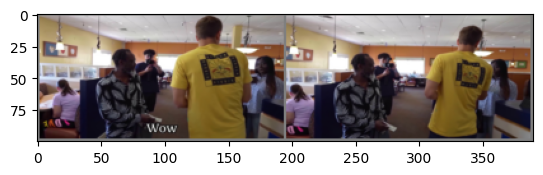

Post reconstruction loss for class 14 is 57.7367


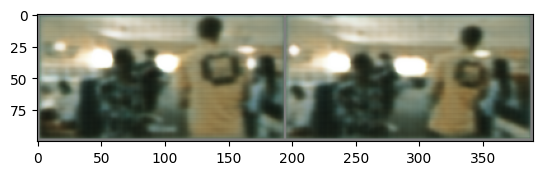

Post reconstruction loss for class 14 is 48.0430
torch.Size([1, 3, 96, 192])


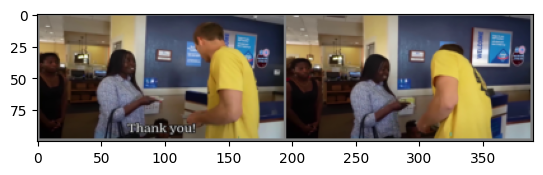

Post reconstruction loss for class 15 is 54.9436


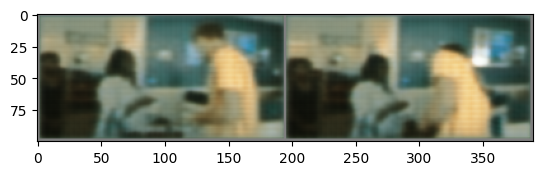

Post reconstruction loss for class 15 is 42.6732
torch.Size([1, 3, 96, 192])


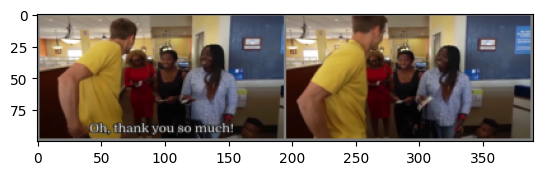

Post reconstruction loss for class 16 is 46.6279


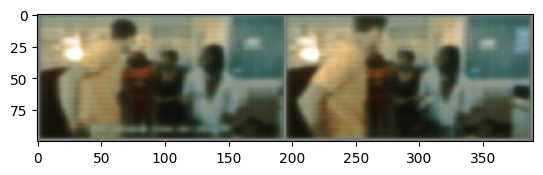

Post reconstruction loss for class 16 is 38.0392
torch.Size([1, 3, 96, 192])

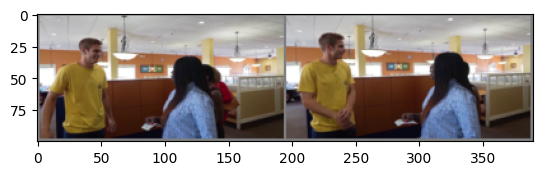

Post reconstruction loss for class 17 is 41.1871


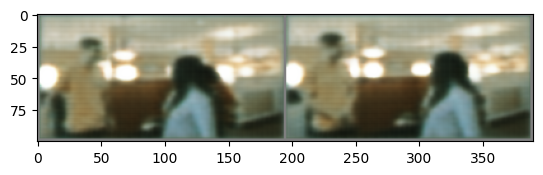

Post reconstruction loss for class 17 is 33.1314


torch.Size([1, 3, 96, 192])


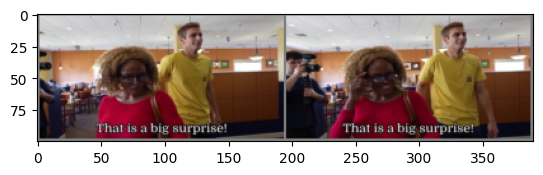

Post reconstruction loss for class 18 is 40.5076


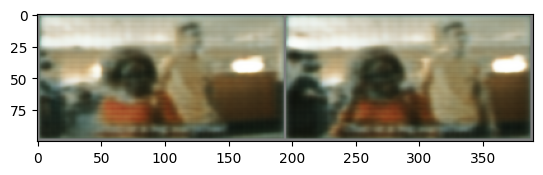

Post reconstruction loss for class 18 is 35.4057
torch.Size([1, 3, 96, 192])


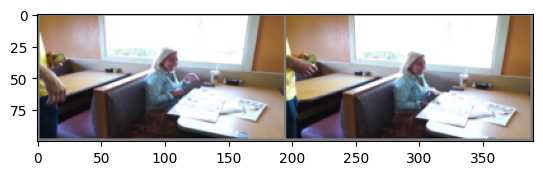

Post reconstruction loss for class 19 is 36.6501


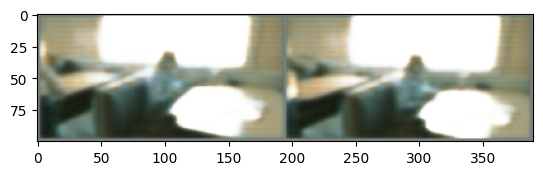

Post reconstruction loss for class 19 is 24.5210


In [7]:
model.eval()
losses_pre = []
losses_post = []
classes = list(range(num_classes))
for batch_idx, (img_in, _) in enumerate(dataiter):
    img_in = img_in.to(device)
    img_in0 = torch.unsqueeze(img_in[0], axis=0)
    img_in1 = torch.unsqueeze(img_in[1], axis=0)
    print(img_in1.shape)
    loss_pre = criterion(img_in0, img_in1)
    losses_pre.append(loss_pre.item())
    img_out = model(img_in)
    img_out0 = torch.unsqueeze(img_out[0], axis=0)
    img_out1 = torch.unsqueeze(img_out[1], axis=0)
    loss_post = criterion(img_out0, img_out1)
    losses_post.append(loss_post.item())
    imshow(torchvision.utils.make_grid(img_in.to("cpu")))
    print(f"Post reconstruction loss for class {batch_idx} is {loss_pre.item():.4f}")
    imshow(torchvision.utils.make_grid(img_out.to("cpu")))
    print(f"Post reconstruction loss for class {batch_idx} is {loss_post.item():.4f}")

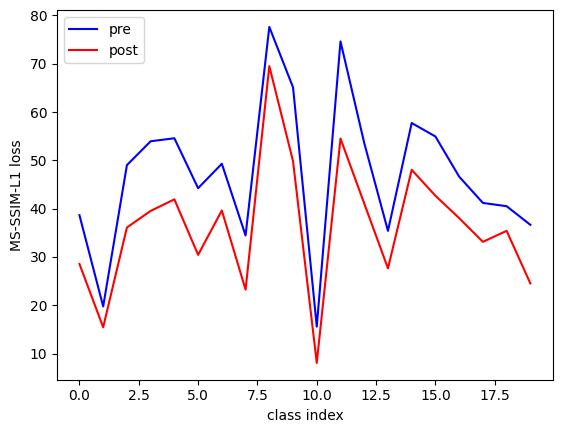

In [8]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(classes, losses_pre,  label="pre", c='b')
ax1.plot(classes, losses_post, label="post", c='r')
plt.xlabel("class index")
plt.ylabel("MS-SSIM-L1 loss")
plt.legend(loc='upper left')
plt.show()

### Comparing latent dim differences:
- Take MSE of latent dim of images and compare with the MSSIM loss of reconstructed images

In [9]:
# Device and model hyperparameters
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Autoencoder(get_latent=True).to(device)
criterion = nn.L1Loss()
# Loading checkpoint
checkpoint_dir = "./checkpoints"
loading_epoch = get_latest_epoch(checkpoint_dir)
if loading_epoch != 0:
    resume(model, f"{str(checkpoint_dir)}/MS_SSIM_L1-epoch-{str(loading_epoch)}.pth")
    print(f"start inference from epoch {str(loading_epoch)}")
else:
    raise Exception("No checkpoint found, please upload checkpoint for inference")

start inference from epoch 50


In [14]:
batch_size = 2
sim_pairs = CustomDataModule(data_dir='./sim_pairs/', batch_size=2, train_size = 1.0)
sim_pairs.transform()
num_classes = len(sim_pairs.dataset.classes)
dataloader = sim_pairs.ordered_dataloader()
dataiter = iter(dataloader)
# print the shape of the data
print('length of dataiter',len(dataiter))
img, label = next(dataiter)
print(f'image shape:{img.shape}, label shape: {label.shape}') # torch.Size([2, 3, 96, 192]) torch.Size([2])
# to refresh dataloader
dataloader = sim_pairs.ordered_dataloader()
dataiter = iter(dataloader)

length of dataiter 20
image shape:torch.Size([2, 3, 96, 192]), label shape: torch.Size([2])


In [15]:
model.eval()
losses_pre = []
losses_latent = []
classes = list(range(num_classes))
for batch_idx, (img_in, _) in enumerate(dataiter):
    img_in = img_in.to(device)
    img_in0 = torch.unsqueeze(img_in[0], axis=0)
    img_in1 = torch.unsqueeze(img_in[1], axis=0)
    loss_pre = criterion(img_in0, img_in1)
    losses_pre.append(loss_pre.item())
    img_out = model(img_in)
    img_out0 = img_out[0]
    img_out1 = img_out[1]
    loss_latent = criterion(img_out0, img_out1)
    losses_latent.append(loss_latent.item())
    print(f"Pre reconstruction L1 loss for class {batch_idx} is {loss_pre.item():.4f}")
    print(f"Latent reconstruction L1 loss for class {batch_idx} is {loss_latent.item():.4f}")

Pre reconstruction L1 loss for class 0 is 0.1844
Latent reconstruction L1 loss for class 0 is 0.7138
Pre reconstruction L1 loss for class 1 is 0.0869
Latent reconstruction L1 loss for class 1 is 0.3818
Pre reconstruction L1 loss for class 2 is 0.2440
Latent reconstruction L1 loss for class 2 is 1.4219
Pre reconstruction L1 loss for class 3 is 0.2696
Latent reconstruction L1 loss for class 3 is 1.1894
Pre reconstruction L1 loss for class 4 is 0.2762
Latent reconstruction L1 loss for class 4 is 1.5384
Pre reconstruction L1 loss for class 5 is 0.2204
Latent reconstruction L1 loss for class 5 is 1.1341
Pre reconstruction L1 loss for class 6 is 0.2495
Latent reconstruction L1 loss for class 6 is 1.4490
Pre reconstruction L1 loss for class 7 is 0.1650
Latent reconstruction L1 loss for class 7 is 0.8938
Pre reconstruction L1 loss for class 8 is 0.4087
Latent reconstruction L1 loss for class 8 is 2.7832
Pre reconstruction L1 loss for class 9 is 0.3401
Latent reconstruction L1 loss for class 9 

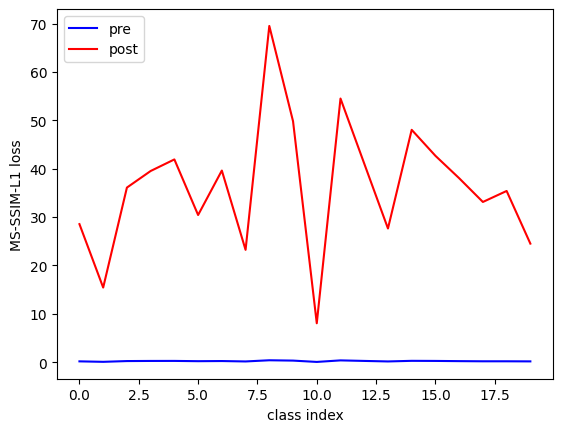

In [16]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(classes, losses_pre,  label="pre", c='b')
ax1.plot(classes, losses_post, label="post", c='r')
plt.xlabel("class index")
plt.ylabel("MS-SSIM-L1 loss")
plt.legend(loc='upper left')
plt.show()